In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import subprocess

In [8]:
def curve_calc(x):
    curve_point=0.296195475*sin(0.110063173*x+0.907566)+0.052306518*sin(0.220128134*x+0.824689)+4.61711602
    return(curve_point)

A program kiválasztja a fénygörbékből azokat a csúcsokat, melyek környezetében megfelelő mennyiségű pont található megfelelő eloszlásban. Ezeket aztán megilleszti és kimenti az adatokat.

In [3]:
from scipy.optimize import curve_fit
from scipy.optimize import minimize_scalar
from numpy import loadtxt
from numpy import append
import codecs
import os

# ASAS adatok feldolgozása

In [82]:
#lowlim=2411378.1
uplim=2455193.979
maxepochx=2451935.711
deltat=3
period=1/0.110099374

In [77]:
data=numpy.loadtxt('./Period/Kap_Pav/feldolg_asas_asc.dat')

In [78]:
data.shape

(718, 2)

In [85]:
program = './Period/OCPeak.exe'
n=numpy.zeros((6))
q=1
i=0
maxepoch=maxepochx
while(i<data.shape[0]):
    if(maxepoch-3<data[i,0] and data[i,0]<maxepoch-2):
        n[0]+=1
        i+=1
    if(maxepoch-2<data[i,0] and data[i,0]<maxepoch-1):
        n[1]+=1
        i+=1
    if(maxepoch-1<data[i,0] and data[i,0]<maxepoch-0):
        n[2]+=1
        i+=1
    if(maxepoch-0<data[i,0] and data[i,0]<maxepoch+1):
        n[3]+=1
        i+=1
    if(maxepoch+1<data[i,0] and data[i,0]<maxepoch+2):
        n[4]+=1
        i+=1
    if(maxepoch+2<data[i,0] and data[i,0]<maxepoch+3):
        n[5]+=1
        i+=1
    else:
        r=0
        for j in range (0,6):
            if(n[j]>0):
                r+=1
        if(r>4):
            num=str(q)+'.dat '+str(maxepoch)
            argument = ['./Period/Kap_Pav/feldolg_asas_asc.dat ./Period/Kap_Pav/ASAS/' +num]
            subprocess.Popen([program, argument])
            maxepoch+=period
            n=numpy.zeros((6))
            q+=1
        if(i+1<data.shape[0]):
            if(data[i+1,0]>maxepoch+3):
                maxepoch+=period
                n=numpy.zeros((6))
        i+=1

In [88]:
indir = './Period/Kap_Pav/ASAS'
peaks={}
for root, dirs, filenames in os.walk(indir):
    i=0
    for f in filenames:
        filecp = codecs.open(os.path.join(root, f), encoding = 'cp1252')
        content = loadtxt(filecp, comments="#", delimiter="\t", unpack=False)
        array=content[:,[0, 1]]
        peaks[i]=array
        i+=1
        del content
        del array

In [89]:
for j in range (0,i):
    data=peaks[j]
    
    mi=min(data[:,0])
    ma=max(data[:,0])
    corr=mi
    epsle=0.05
    epsfel=(ma-mi)/20-0.05

    mg=data[:,1]
    t=(data[:,0]-corr)/20
    z=numpy.polyfit(t,mg,5)
    p5r=numpy.poly1d(z)

    minb=0.2
    maxb=1.0
    result = minimize_scalar(p5r, bounds=(minb, maxb), method='bounded')
    result

    mt=result.x
    mm=p5r(result.x)

    tn=numpy.append(t,mt)
    mgn=numpy.append(mg,mm)

    zn=numpy.polyfit(tn,mgn,5)
    p5rn=numpy.poly1d(zn)

    resultn=minimize_scalar(p5rn, bounds=(minb, maxb), method='bounded')
    resultn

    line=[20*resultn.x+corr,resultn.fun]

    with open('./Period/Kap_Pav/peaks_kappav_asas_new.dat', 'a') as filee:
        for item in line:
            filee.write("%f " % item)
        filee.write("\n")
    filee.close()

# SMEI adatok feldolgozása

In [95]:
uplim=2455193.979
maxepochx=2453779.512
deltat=3
period=1/0.110207686

data=numpy.loadtxt('./Period/Kap_Pav/feldolg_kap_pav_smeihib_asc.dat')

n=numpy.zeros((6))
q=1
i=0
maxepoch=maxepochx
while(i<data.shape[0]):
    if(maxepoch-3<data[i,0] and data[i,0]<maxepoch-2):
        n[0]+=1
        i+=1
    if(maxepoch-2<data[i,0] and data[i,0]<maxepoch-1):
        n[1]+=1
        i+=1
    if(maxepoch-1<data[i,0] and data[i,0]<maxepoch-0):
        n[2]+=1
        i+=1
    if(maxepoch-0<data[i,0] and data[i,0]<maxepoch+1):
        n[3]+=1
        i+=1
    if(maxepoch+1<data[i,0] and data[i,0]<maxepoch+2):
        n[4]+=1
        i+=1
    if(maxepoch+2<data[i,0] and data[i,0]<maxepoch+3):
        n[5]+=1
        i+=1
    else:
        r=0
        for j in range (0,6):
            if(n[j]>0):
                r+=1
        if(r>4):
            num=str(q)+'.dat '+str(maxepoch)
            argument = ['./Period/Kap_Pav/feldolg_kap_pav_smeihib_asc.dat ./Period/Kap_Pav/SMEIHIB/' +num]
            subprocess.Popen([program, argument])
            maxepoch+=period
            n=numpy.zeros((6))
            q+=1
        if(i+1<data.shape[0]):
            if(data[i+1,0]>maxepoch+3):
                maxepoch+=period
                n=numpy.zeros((6))
        i+=1

In [4]:
indir = './Period/Kap_Pav/SMEIHIB'
peaks={}
for root, dirs, filenames in os.walk(indir):
    i=0
    for f in filenames:
        filecp = codecs.open(os.path.join(root, f), encoding = 'cp1252')
        content = loadtxt(filecp, comments="#", delimiter="\t", unpack=False)
        array=content[:,[0, 1]]
        peaks[i]=array
        i+=1
        del content
        del array

In [5]:
for j in range (0,i):
    data=peaks[j]
    
    mi=min(data[:,0])
    ma=max(data[:,0])
    corr=mi
    epsle=0.05
    epsfel=(ma-mi)/20-0.05

    mg=data[:,1]
    t=(data[:,0]-corr)/20
    z=numpy.polyfit(t,mg,5)
    p5r=numpy.poly1d(z)

    minb=0.2
    maxb=1.0
    result = minimize_scalar(p5r, bounds=(minb, maxb), method='bounded')
    result

    mt=result.x
    mm=p5r(result.x)

    tn=numpy.append(t,mt)
    mgn=numpy.append(mg,mm)

    zn=numpy.polyfit(tn,mgn,5)
    p5rn=numpy.poly1d(zn)

    resultn=minimize_scalar(p5rn, bounds=(minb, maxb), method='bounded')
    resultn

    line=[20*resultn.x+corr,resultn.fun]

    with open('./Period/Kap_Pav/peaks_kappav_smeihib_new.dat', 'a') as filee:
        for item in line:
            filee.write("%f " % item)
        filee.write("\n")
    filee.close()

# AAVSO adatok feldolgozása 

In [ ]:
uplim=2455193.979
maxepochx=2451935.711
deltat=3
period=1/0.110099374

data=numpy.loadtxt('./Period/Kap_Pav/feldolg_aavso_asc.dat')

n=numpy.zeros((6))
q=1
i=0
maxepoch=maxepochx
while(i<data.shape[0]):
    if(maxepoch-3<data[i,0] and data[i,0]<maxepoch-2):
        n[0]+=1
        i+=1
    if(maxepoch-2<data[i,0] and data[i,0]<maxepoch-1):
        n[1]+=1
        i+=1
    if(maxepoch-1<data[i,0] and data[i,0]<maxepoch-0):
        n[2]+=1
        i+=1
    if(maxepoch-0<data[i,0] and data[i,0]<maxepoch+1):
        n[3]+=1
        i+=1
    if(maxepoch+1<data[i,0] and data[i,0]<maxepoch+2):
        n[4]+=1
        i+=1
    if(maxepoch+2<data[i,0] and data[i,0]<maxepoch+3):
        n[5]+=1
        i+=1
    else:
        r=0
        for j in range (0,6):
            if(n[j]>0):
                r+=1
        if(r>4):
            num=str(q)+'.dat '+str(maxepoch)
            argument = ['./Period/Kap_Pav/feldolg_aavso_asc.dat ./Period/Kap_Pav/AAVSO/' +num]
            subprocess.Popen([program, argument])
            maxepoch+=period
            n=numpy.zeros((6))
            q+=1
        if(i+1<data.shape[0]):
            if(data[i+1,0]>maxepoch+3):
                maxepoch+=period
                n=numpy.zeros((6))
        i+=1

In [92]:
indir = './Period/Kap_Pav/AAVSO'
peaks={}
for root, dirs, filenames in os.walk(indir):
    i=0
    for f in filenames:
        filecp = codecs.open(os.path.join(root, f), encoding = 'cp1252')
        content = loadtxt(filecp, comments="#", delimiter="\t", unpack=False)
        array=content[:,[0, 1]]
        peaks[i]=array
        i+=1
        del content
        del array

In [93]:
for j in range (0,i):
    data=peaks[j]
    
    mi=min(data[:,0])
    ma=max(data[:,0])
    corr=mi
    epsle=0.05
    epsfel=(ma-mi)/20-0.05

    mg=data[:,1]
    t=(data[:,0]-corr)/20
    z=numpy.polyfit(t,mg,5)
    p5r=numpy.poly1d(z)

    minb=0.2
    maxb=1.0
    result = minimize_scalar(p5r, bounds=(minb, maxb), method='bounded')
    result

    mt=result.x
    mm=p5r(result.x)

    tn=numpy.append(t,mt)
    mgn=numpy.append(mg,mm)

    zn=numpy.polyfit(tn,mgn,5)
    p5rn=numpy.poly1d(zn)

    resultn=minimize_scalar(p5rn, bounds=(minb, maxb), method='bounded')
    resultn

    line=[20*resultn.x+corr,resultn.fun]

    with open('./Period/Kap_Pav/peaks_kappav_aavso_new.dat', 'a') as filee:
        for item in line:
            filee.write("%f " % item)
        filee.write("\n")
    filee.close()

D:\Program Files\WinPyth\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
D:\Program Files\WinPyth\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
D:\Program Files\WinPyth\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
D:\Program Files\WinPyth\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
D:\Program Files\WinPyth\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
D:\Pr

# Plottolás és illesztés

Először lefuttatom az OC programomat az egy peak fájlokra, majd ábrázolgatom őket, illetve illesztek rájuk

In [29]:
program = './Period/OCCalc.exe'
argument = ['./Period/Kap_Pav/peaks_kappav_smei_new.dat 2452680.670682 0.110063173 2452645.0 2455881.35 193 1.5 ./Period/Kap_Pav/OC_kappav_smei.dat']
subprocess.Popen([program, argument])
argument = ['./Period/Kap_Pav/peaks_kappav_smeihib_new.dat 2452680.670682 0.110063173 2452645.0 2455881.35 19 1.5 ./Period/Kap_Pav/OC_kappav_smeihib.dat']
subprocess.Popen([program, argument])
argument = ['./Period/Kap_Pav/peaks_kappav_asas.dat 2452680.670682 0.110063173 2452053.0 2452571.6 3 1.5 ./Period/Kap_Pav/OC_kappav_asas.dat']
subprocess.Popen([program, argument])
argument = ['./Period/Kap_Pav/peaks_kappav_aavso_new.dat 2452680.670682 0.110063173 2411591.0 2440601.6 74 1.5 ./Period/Kap_Pav/OC_kappav_aavso.dat']
subprocess.Popen([program, argument])
argument = ['./Period/Kap_Pav/peaks_kappav_hipp.dat 2452680.670682 0.110063173 2447911.0 2449065.6 6  1.5 ./Period/Kap_Pav/OC_kappav_hipp.dat']
subprocess.Popen([program, argument])

In [3]:
aavso=loadtxt('./Period/Kap_Pav/OC_kappav_aavso.dat')
asas=loadtxt('./Period/Kap_Pav/OC_kappav_asas.dat')
smei=loadtxt('./Period/Kap_Pav/OC_kappav_smei.dat')
smeihib=loadtxt('./Period/Kap_Pav/OC_kappav_smeihib.dat')
hipp=loadtxt('./Period/Kap_Pav/OC_kappav_hipp.dat')

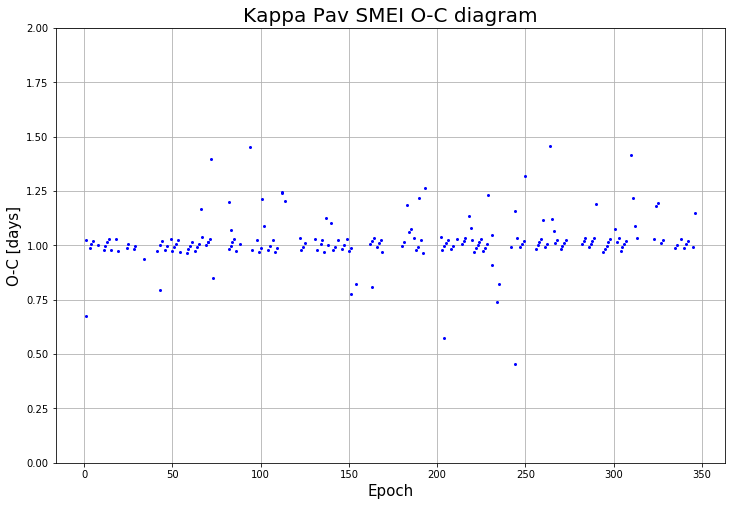

In [12]:
figsize(12,8)
plot(smei[:,1],smei[:,2],'bo',ms=2)
plot(smeihib[:,1],smeihib[:,2],'bo',ms=2)
ylim(0,2)
grid(True)
xlabel('Epoch',fontsize=15)
ylabel('O-C [days]',fontsize=15)
title('Kappa Pav SMEI O-C diagram',fontsize=20)
savefig('./Period/Kap_Pav/Kap_Pav_O-C_SMEI.png', bbox_inches='tight')

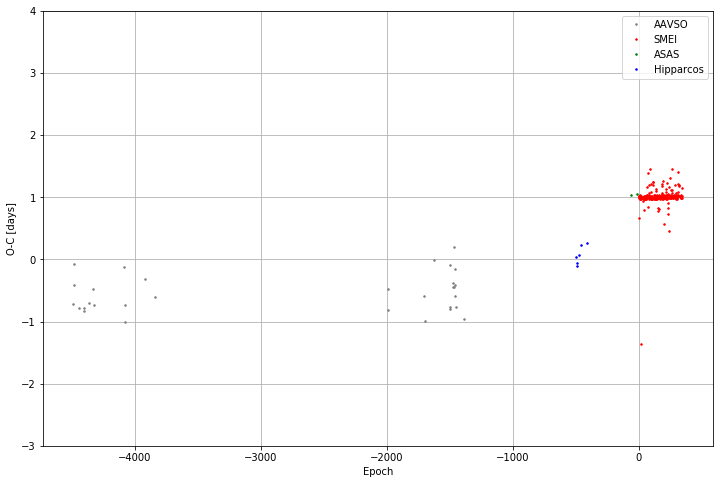

In [120]:
figsize(12,8)
plot(aavso[:,1],aavso[:,2],'o',color='grey',ms=1.5,label='AAVSO')
plot(smei[:,1],smei[:,2],'ro',ms=1.5,label='SMEI')
plot(asas[:,1],asas[:,2],'go',ms=1.5,label='ASAS')
plot(smeihib[:,1],smeihib[:,2],'ro',ms=1.5)
plot(hipp[:,1],hipp[:,2],'bo',ms=1.5,label='Hipparcos')
#plot(tt,polyval(z,tt),color='salmon',label='Fitted parabole')
#plot(tt,polyval(z1,tt),color='lightblue',label='No AAVSO fitted parabole')
grid(True)
plt.legend()
xlabel('Epoch')
ylabel('O-C [days]')
ylim(-3,4)
#xlim(-5000,700)
savefig('./Period/Kap_Pav/Kap_Pav_O-C_eredeti.png', bbox_inches='tight')

In [97]:
ydim=numpy.empty((5))
ydim[0]=int(aavso.shape[0])
ydim[1]=int(smei.shape[0])
ydim[2]=int(smeihib.shape[0])
ydim[3]=int(asas.shape[0])
ydim[4]=int(hipp.shape[0])
measp=int(sum(ydim))
print(measp)

239


In [98]:
data=numpy.empty((measp,3))
data[0:ydim[0],:]=aavso[:,:]
data[ydim[0]:ydim[0]+ydim[1],:]=smei[:,:]
data[ydim[0]+ydim[1]:ydim[0]+ydim[1]+ydim[2],:]=smeihib[:,:]
data[ydim[0]+ydim[1]+ydim[2]:ydim[0]+ydim[1]+ydim[2]+ydim[3],:]=asas[:,:]
data[ydim[0]+ydim[1]+ydim[2]+ydim[3]:ydim[0]+ydim[1]+ydim[2]+ydim[3]+ydim[4],:]=hipp[:,:]

D:\Program Files\WinPyth\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
D:\Program Files\WinPyth\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\ipykernel\__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
D:\Program Files\WinPyth\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\ipykernel\__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
D:\Program Files\WinPyth\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
D:\Program Files\Wi

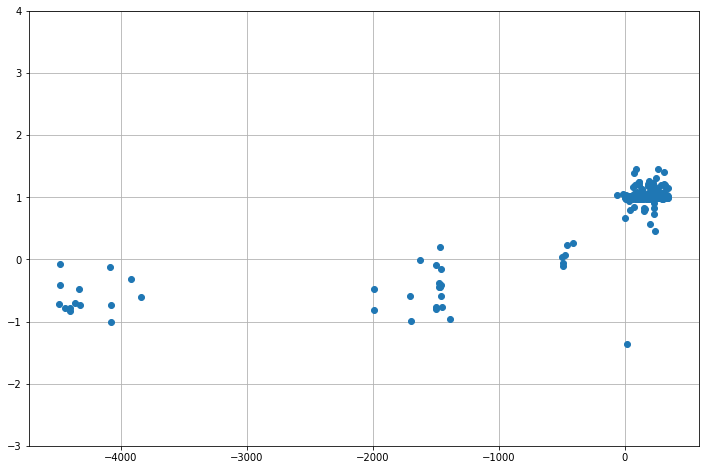

In [54]:
plot(data[:,1],data[:,2],'o')
ylim(-3,4)
grid(True)

In [55]:
with open ('./Period/Kap_Pav/OC_kappav_teljes.dat', 'a') as filee:
    for i in range (0,measp):
        for item in data[i,:]:
            filee.write("%f \t" % item)
        filee.write("\n")
    filee.close

In [48]:
z=polyfit(data[:,1],data[:,2],2)
tt=linspace(-5000,600,20000)
print(z)

[  1.47310191e-07   8.82645736e-04   8.40363387e-01]


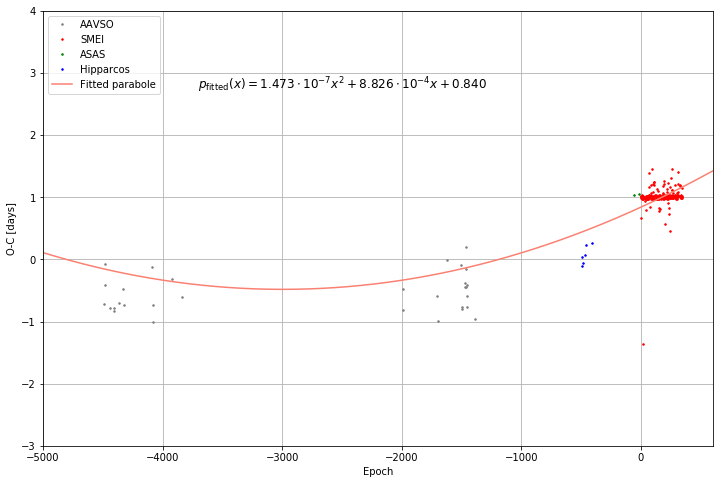

In [121]:
figsize(12,8)
plot(aavso[:,1],aavso[:,2],'o',color='grey',ms=1.5,label='AAVSO')
plot(smei[:,1],smei[:,2],'ro',ms=1.5,label='SMEI')
plot(asas[:,1],asas[:,2],'go',ms=1.5,label='ASAS')
plot(smeihib[:,1],smeihib[:,2],'ro',ms=1.5)
plot(hipp[:,1],hipp[:,2],'bo',ms=1.5,label='Hipparcos')
plot(tt,polyval(z,tt),color='salmon',label='Fitted parabole')
#plot(tt,polyval(z1,tt),color='lightblue',label='No AAVSO fitted parabole')
grid(True)
plt.legend(loc=2)
xlabel('Epoch')
ylabel('O-C [days]')
ylim(-3,4)
xlim(-5000,600)
plt.text(-3700, 2.75, '$p_{\mathrm{fitted}}(x)=1.473\cdot 10^{-7} x^2 + 8.826\cdot 10^{-4} x + 0.840$',
        #verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=12)
#xlim(-5000,700)
savefig('./Period/Kap_Pav/Kap_Pav_O-C_illesztett.png', bbox_inches='tight')

Innentől kezdve csak az egyes adatsorokat átlagolom bizonyos időskálákon

In [58]:
smeidat=numpy.empty((ydim[1]+ydim[2],3))
smeidat[0:ydim[1],:]=smei[:,:]
smeidat[ydim[1]:ydim[2]+ydim[1],:]=smeihib[:,:]

D:\Program Files\WinPyth\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\ipykernel\__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':
D:\Program Files\WinPyth\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
D:\Program Files\WinPyth\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\ipykernel\__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


In [103]:
atlagido=numpy.empty(1)
atlagfen=numpy.empty(1)
atlagjd=numpy.empty(1)
stepr=40
eps=min(smeidat[:,1])-0.1
gr=0
while(eps<max(smeidat[:,1]+stepr)):
    jds=0
    epochs=0
    vals=0
    nums=0
    for i in range (0,int(ydim[1]+ydim[2])):
        if(eps+stepr>smeidat[i,1] and smeidat[i,1]>eps):
            jds+=smeidat[i,0]
            epochs+=smeidat[i,1]
            vals+=smeidat[i,2]
            nums+=1
    if(nums!=0 and gr==1):
        atj=jds/nums
        atli=epochs/nums
        atlf=vals/nums
        atlagjd=append(atlagjd,atj)
        atlagido=append(atlagido,atli)
        atlagfen=append(atlagfen,atlf)
    if(nums!=0 and gr==0):
        atlagjd=jds/nums
        atlagido=epochs/nums
        atlagfen=vals/nums
        gr=1
    eps+=stepr

In [104]:
atlagolt=vstack((atlagido,atlagfen))
atlagolt=vstack((atlagjd,atlagolt)).T
print(atlagolt)

[[  2.45281781e+06   1.50000000e+01   8.55890421e-01]
 [  2.45320697e+06   5.78148148e+01   1.00793493e+00]
 [  2.45356384e+06   9.70869565e+01   1.07117096e+00]
 [  2.45394210e+06   1.38727273e+02   9.92185727e-01]
 [  2.45430123e+06   1.78250000e+02   1.03369835e+00]
 [  2.45466429e+06   2.18214286e+02   9.87746429e-01]
 [  2.45502808e+06   2.58250000e+02   1.03353167e+00]
 [  2.45538585e+06   2.97625000e+02   1.04867504e+00]
 [  2.45572193e+06   3.34615385e+02   1.04729885e+00]]


In [94]:
y1dim=numpy.empty((4))
y1dim[0]=int(aavso.shape[0])
y1dim[1]=int(atlagolt.shape[0])
y1dim[2]=int(hipp.shape[0])
y1dim[3]=int(asas.shape[0])
measp=int(sum(y1dim))
print(measp)

48


In [95]:
data2=numpy.empty((measp,3))
data2[0:y1dim[0],:]=aavso[:,:]
data2[y1dim[0]:y1dim[0]+y1dim[1],:]=atlagolt[:,:]
data2[y1dim[0]+y1dim[1]:y1dim[0]+y1dim[1]+y1dim[2],:]=hipp[:,:]
data2[y1dim[0]+y1dim[1]+y1dim[2]:y1dim[0]+y1dim[1]+y1dim[2]+y1dim[3],:]=asas[:,:]

D:\Program Files\WinPyth\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
D:\Program Files\WinPyth\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\ipykernel\__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
D:\Program Files\WinPyth\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\ipykernel\__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
D:\Program Files\WinPyth\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


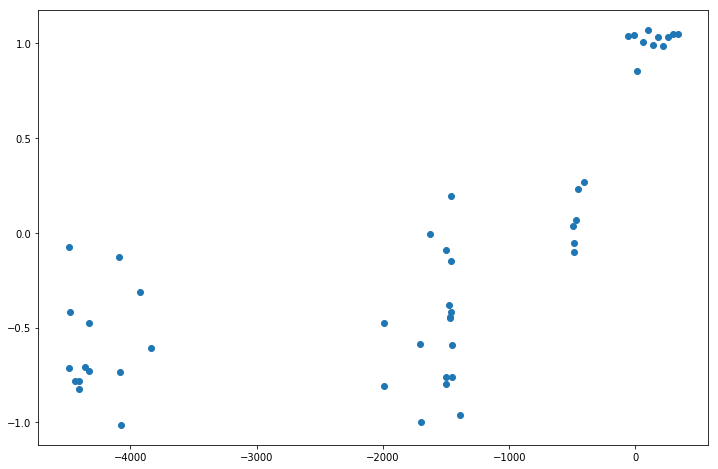

In [96]:
plot(data2[:,1],data2[:,2],'o')

In [100]:
atlagido=numpy.empty(1)
atlagfen=numpy.empty(1)
atlagjd=numpy.empty(1)
stepr=40
eps=min(aavso[:,1])-0.1
gr=0
while(eps<max(aavso[:,1]+stepr)):
    jds=0
    epochs=0
    vals=0
    nums=0
    for i in range (0,int(ydim[0])):
        if(eps+stepr>aavso[i,1] and aavso[i,1]>eps):
            jds+=aavso[i,0]
            epochs+=aavso[i,1]
            vals+=aavso[i,2]
            nums+=1
    if(nums!=0 and gr==1):
        atj=jds/nums
        atli=epochs/nums
        atlf=vals/nums
        atlagjd=append(atlagjd,atj)
        atlagido=append(atlagido,atli)
        atlagfen=append(atlagfen,atlf)
    if(nums!=0 and gr==0):
        atlagjd=jds/nums
        atlagido=epochs/nums
        atlagfen=vals/nums
        gr=1
    eps+=stepr

In [101]:
atlagolt2=vstack((atlagido,atlagfen))
atlagolt2=vstack((atlagjd,atlagolt2)).T
print(atlagolt2)

[[  2.41193397e+06  -4.48466667e+03  -4.02163000e-01]
 [  2.41232125e+06  -4.44200000e+03  -7.82653000e-01]
 [  2.41264831e+06  -4.40600000e+03  -8.04686000e-01]
 [  2.41320275e+06  -4.34500000e+03  -5.91197500e-01]
 [  2.41337524e+06  -4.32600000e+03  -7.30430000e-01]
 [  2.41558923e+06  -4.08233333e+03  -6.25580667e-01]
 [  2.41704628e+06  -3.92200000e+03  -3.12866000e-01]
 [  2.41781827e+06  -3.83700000e+03  -6.06316000e-01]
 [  2.43459950e+06  -1.99000000e+03  -6.42323500e-01]
 [  2.43722057e+06  -1.70150000e+03  -7.92228500e-01]
 [  2.43792550e+06  -1.62400000e+03  -8.29500000e-03]
 [  2.43905764e+06  -1.49933333e+03  -5.47361667e-01]
 [  2.43939361e+06  -1.46237500e+03  -3.74381625e-01]
 [  2.44006877e+06  -1.38800000e+03  -9.61413000e-01]]


In [106]:
y2dim=numpy.empty((4))
y2dim[0]=int(atlagolt2.shape[0])
y2dim[1]=int(atlagolt.shape[0])
y2dim[2]=int(hipp.shape[0])
y2dim[3]=int(asas.shape[0])
measp=int(sum(y2dim))
print(measp)
data3=numpy.empty((measp,3))
data3[0:y2dim[0],:]=atlagolt2[:,:]
data3[y2dim[0]:y2dim[0]+y2dim[1],:]=atlagolt[:,:]
data3[y2dim[0]+y2dim[1]:y2dim[0]+y2dim[1]+y2dim[2],:]=hipp[:,:]
data3[y2dim[0]+y2dim[1]+y2dim[2]:y2dim[0]+y2dim[1]+y2dim[2]+y2dim[3],:]=asas[:,:]

31


D:\Program Files\WinPyth\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\ipykernel\__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
D:\Program Files\WinPyth\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\ipykernel\__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
D:\Program Files\WinPyth\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\ipykernel\__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
D:\Program Files\WinPyth\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\ipykernel\__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [123]:
with open ('./Period/Kap_Pav/OC_kappav_osszeatlagolt.dat', 'a') as filee:
    for i in range (0,measp):
        for item in data[i,:]:
            filee.write("%f \t" % item)
        filee.write("\n")
    filee.close

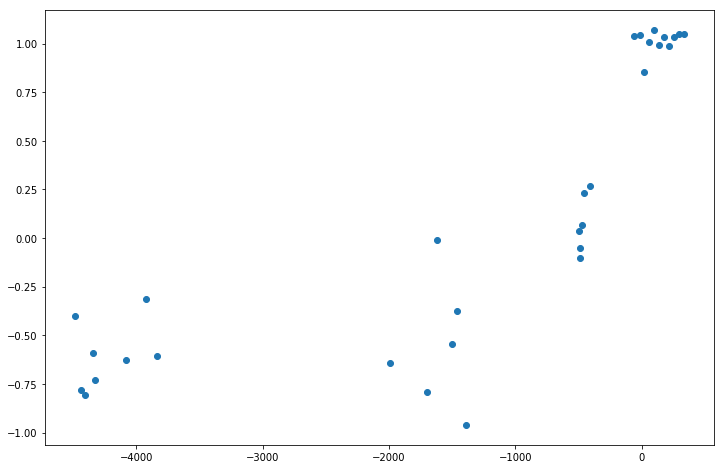

In [107]:
plot(data3[:,1],data3[:,2],'o')

In [108]:
z1=polyfit(data3[:,1],data3[:,2],2)
print(z1)

[  1.92400527e-07   1.14406654e-03   7.63613787e-01]


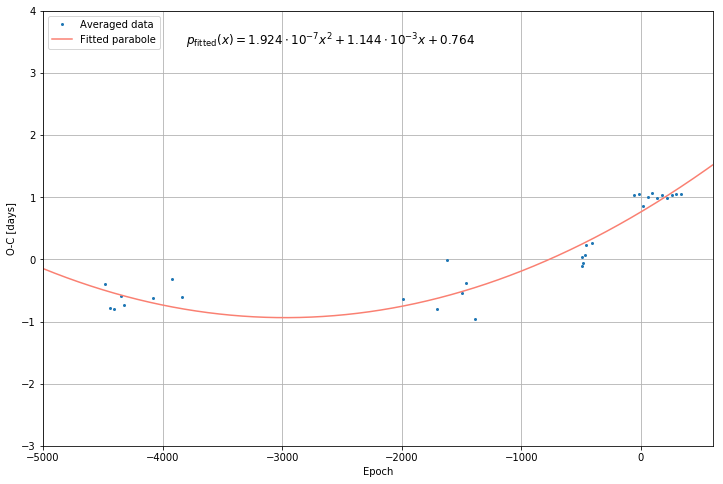

In [122]:
plot(data3[:,1],data3[:,2],'o',ms=2,label='Averaged data')
plot(tt,polyval(z1,tt),color='salmon',label='Fitted parabole')
plt.legend()
grid(True)
plt.legend(loc=2)
xlabel('Epoch')
ylabel('O-C [days]')
ylim(-3,4)
xlim(-5000,600)
plt.text(-3800, 3.45, '$p_{\mathrm{fitted}}(x)=1.924\cdot 10^{-7} x^2 + 1.144\cdot 10^{-3} x + 0.764$',
        #verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=12)
savefig('./Period/Kap_Pav/Kap_Pav_O-C_atlagolt_ill.png', bbox_inches='tight')